# Let's make a vowel plot!
This notebook will guide you through producing a plot of vowel data. It first defines a function for easily creating vowel plots. To increase functionality for your specific goals, you can edit the function. This notebook was created by Emily Remirez, a PhD candidate in Linguistics at UC Berkeley. Her email address is eremirez@berkeley.edu, and her website is https://sites.google.com/berkeley.edu/eremirez/

## Record yourself

1. Your first step will be to make a recording of yourself saying a word with every vowel you want to plot. 
    - For example, you could read off the the sentences in the gray box in the template given in Step 3
2. Next, open those recordings in Praat and measure formants
3. Record your measurements
    - You can make a copy this template and use it to record your measurements: 
    https://docs.google.com/spreadsheets/d/1xKb4A2IEBvLBVVY4xmYTa1xca4cFMyr2nPETpUKYPfw/edit?usp=sharing
4. Save your measurements in a csv file
5. Upload that csv file to the same folder that this notebook is in

## Get the code set up

In [1]:
#Import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [2]:
def vowelplot (vowelcsv, color=None, title="Vowel Plot", logscale=False):
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='talk')
    plt.figure(figsize=(10,10))
    
    #plot the data
    ## If your columns are named something different, be sure to change x= and y=
    ### x="yourF2Name", y="yourF1Name"
    
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal="husl"
        else:
            pal="viridis"
            
        pl = sns.scatterplot(x="F2",y="F1",hue=color,data=vowelcsv,palette=pal)
        
    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x="F2",y="F1", data=vowelcsv)
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add Hz to the axis labels
    plt.ylabel("F1 (Hz)")
    plt.xlabel("F2 (Hz)")
    
    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    #Add vowel labels
    #### If your vowel column is named something different, be sure to change
    ##### vowelcsv.Vowel[line], to vowelcsv.YOURVOWELNAME[line]
    for line in range(0,vowelcsv.shape[0]):
        pl.text(vowelcsv.F2[line]+0.2, vowelcsv.F1[line], vowelcsv.Vowel[line], horizontalalignment='left',
            size='medium', color='black', weight='semibold')
    
    pl.set_title(title)
    
    return pl

## Import data
This expects a CSV file (comma separated values) with the following columns. 


It is important for the columns to be named exactly as below in order for the function defined above to work without any editing! If you used the template, you're good to go! If your columns have other names, you'll want to edit the function above; the comments (the lines with a # before them) should help you.

- F1: F1 value in Hz
- F2: F2 value in Hz
- Vowel: vowel in IPA

You may also have other values, like:
- F3: F3 value in Hz
- Token: Token number
- Speaker: Identifier of speaker


It is also fine if there are other columns not listed above in your csv! If there is another feature you want to study, you can add that as well, but you will need to edit the function defined above to use it!

### To import your data
Make sure that the name of the file is correct! The code should look like the example below, with the name of your file in quotes within the parentheses. 
```
voweldata=pd.read_csv('NameOfFile.csv')
```
My example file is called demo-vowels.

In [3]:
voweldata=pd.read_csv('demo-vowels.csv')

## Plot vowels!

The shortest code you can use to make a plot only gives the name of your data. In this example, our data is called voweldata. 

```
vowelplot(MY_DATA)
```

This will plot a your data in F1-F2 space, with all points the same color.

The longest code you could use is:

```
vowelplot(MY_DATA, color="MY COLOR CHOICE", title="MY TITLE", logscale=True/False)
```

These other arguments are all optional.
1. color: What would you like color to represent?
    - Don't forget to put this term in quotes!
    - This needs to be the exact name, including capitalization, of the name of the column in your spreadsheet
2. title: Add a title for your plot!
    - If you don't specify anyhing, your plot will be called "Vowel Plot"
    - If you don't want any title, use title=None
3. logscale: Do you want the axes to be on a log scale?
    - The log scale is closer to how we perceive sound, so it may be more informative
    - use logscale=True to use the log for your axes
    - use logscale=False to use reg'lar axes.



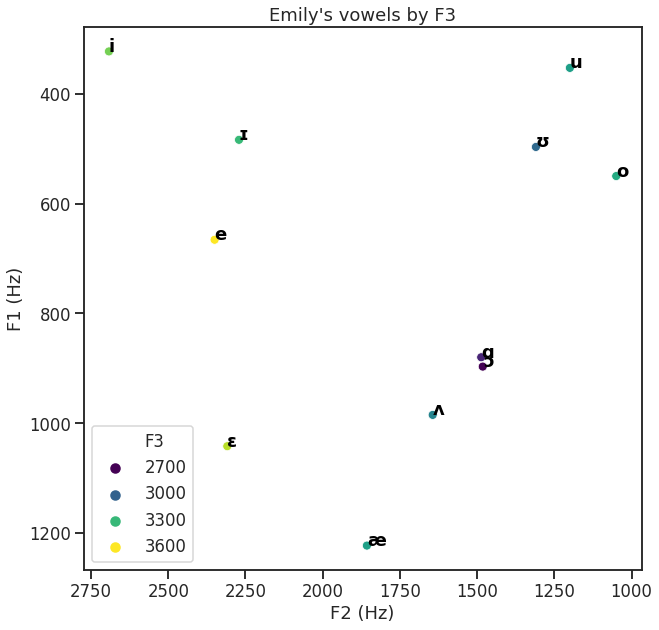

In [4]:
vowelplot(voweldata, color ="F3", title="Emily's vowels by F3", logscale=False)

## Another example
For this example, let's load in some vowel data from Flege 1994. Thanks to Prof Keith Johnson for suggesting this dataset and doing some pre-processing to make it work with this function! This is a rich dataset that will let us visualize a lot of different features!

### Import Flege 1994 as F94

In [5]:
F94=pd.read_csv('Flege_94_vowels.csv')
F94.head()

,lg,Vowel,Ss,point,VOT,dur,FO,F1,F2,F3
0,English,i,1,onset,10,119,131,312,2205,2726
1,English,i,1,midpoint,10,119,131,317,2299,2897
2,English,i,1,offset,10,119,131,320,2257,2829
3,English,i,2,onset,13,93,130,304,1995,2383
4,English,i,2,midpoint,13,93,130,281,2079,2516


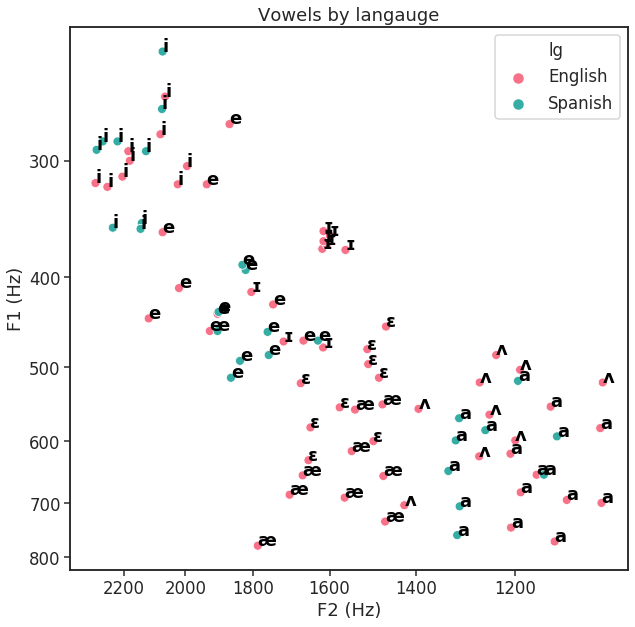

In [6]:
vowelplot(F94, color="lg", title="Vowels by langauge",logscale=True)

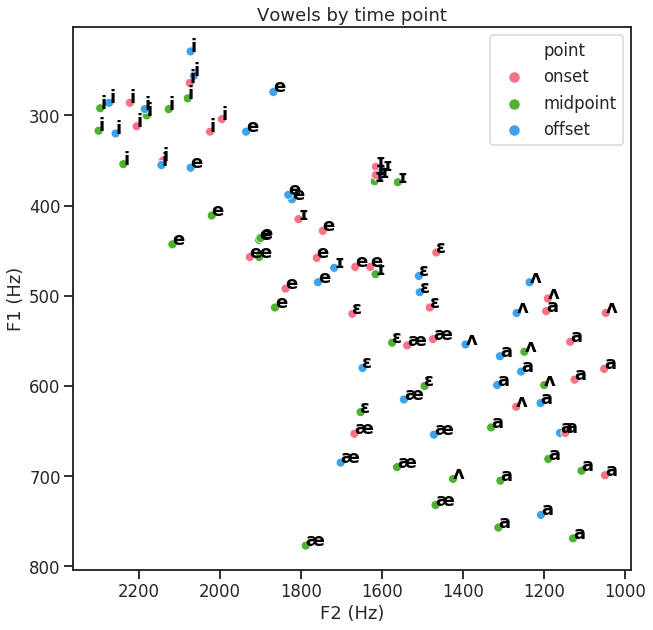

In [7]:
vowelplot(F94, color="point", title="Vowels by time point")

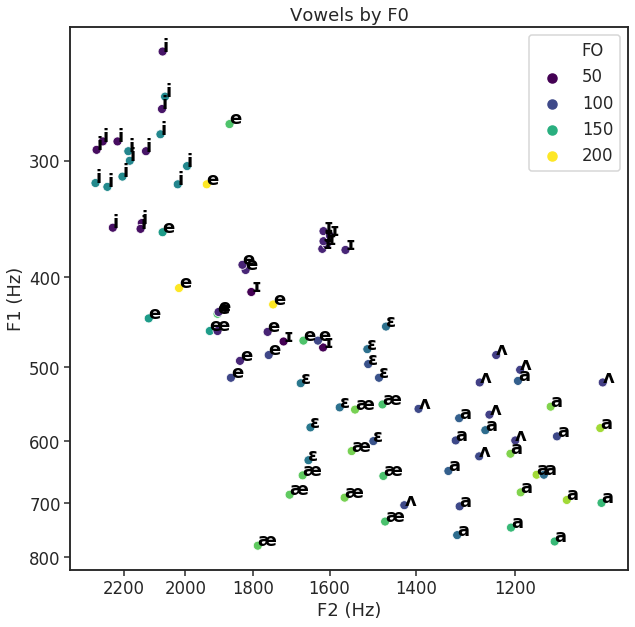

In [8]:
vowelplot(F94, color="FO", title="Vowels by F0",logscale=True)